In [51]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom.utils import pickle_load

from lagom.vis import CurvePlot

In [52]:
log_folder = Path('logs')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

,ID,cuda,env.id,env.standardize,network.recurrent,network.hidden_sizes,algo.lr,algo.use_lr_scheduler,algo.gamma,algo.gae_lambda,...,agent.std_state_dependent,agent.init_std,train.timestep,train.N,train.ratio_T,eval.independent,eval.N,log.record_interval,log.print_interval,log.dir
0,0,True,HalfCheetah-v2,True,False,"[64, 64]",0.0007,True,0.99,0.97,...,False,1.0,1000000.0,1,0.2,True,10,100,100,logs


In [53]:
def load_results(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/f).exists():
            list_result.append(pickle_load(sub/f))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        #x_values = [i['evaluation_iteration'][0] for i in result]
        x_values = [i['accumulated_trained_timesteps'][0] for i in result]
        y_values = [i['average_return'][0] for i in result]
        returns.append([x_values, y_values])
        
    return returns


In [54]:
ID = 0
env_id = configs.loc[configs['ID'] == ID]['env.id'].values[0]

In [55]:
list_result = load_results('logs', ID, 'eval_logs.pkl')
returns = get_returns(list_result)
x_values, y_values = zip(*returns)

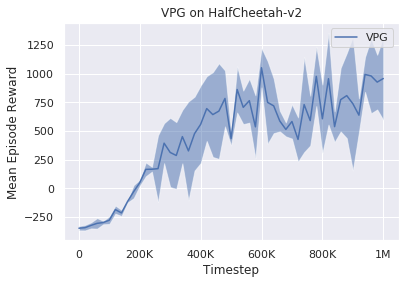

In [56]:
plot = CurvePlot()
plot.add('VPG', y_values, xvalues=x_values)
#plot.add('VPG', [f(y, window_length=41, polyorder=7) for y in y_values], xvalues=x_values)
ax = plot(title=f'VPG on {env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

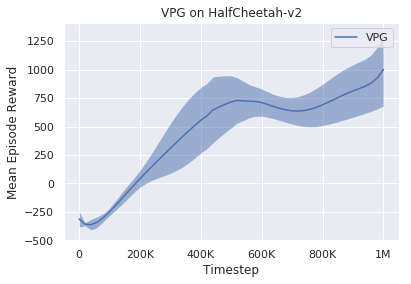

In [20]:
ax.figure.savefig('data/result.png')